<a href="https://colab.research.google.com/github/Divyadarshini08/Machine-Learning/blob/main/Copy_of_Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# starting with standardizing
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.shape

(768, 9)

In [ ]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
X=df.drop('Outcome',axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Assuming X_train is your training data
# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)

[[ 0.90832902  0.91569367  0.44912368 ...  0.37852648  0.67740401
   1.69955804]
 [ 0.03644676 -0.75182191 -0.47230103 ... -0.50667229 -0.07049698
  -0.96569189]
 [-1.12606292  1.38763205  1.06340683 ...  2.54094063 -0.11855487
  -0.88240283]
 ...
 [ 0.03644676 -0.84620959 -0.21634972 ... -0.94927168 -0.95656442
  -1.04898095]
 [ 2.0708387  -1.12937261  0.24436264 ... -0.26640405 -0.50001442
   0.11706589]
 [ 0.32707418  0.47521786  0.65388473 ... -4.07275877  0.52121586
   2.94889395]]


In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(768, 8)
(614, 8)
(154, 8)


In [ ]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(768,)
(614,)
(154,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)
y_train = y_train.astype('int')
y_test = y_test.astype('int')
print("Y TRAIN: ",y_train)
print("Y TEST: ",y_test)

Y TRAIN:  603    1
118    0
247    0
157    0
468    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 614, dtype: int64
Y TEST:  661    1
122    0
113    0
14     1
529    0
      ..
476    1
482    0
230    1
527    0
380    0
Name: Outcome, Length: 154, dtype: int64


In [ ]:
print("X_train features: ",X_train_features)

X_train features:    (0, 6)	1.0
  (1, 4)	1.0
  (2, 1)	1.0
  (3, 7)	1.0
  (4, 5)	1.0
  (5, 2)	1.0
  (6, 3)	1.0
  (7, 0)	1.0


In [ ]:
print("X_test : ",X_test)

X_test :       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
661            1      199             76             43        0  42.9   
122            2      107             74             30      100  33.6   
113            4       76             62              0        0  34.0   
14             5      166             72             19      175  25.8   
529            0      111             65              0        0  24.6   
..           ...      ...            ...            ...      ...   ...   
476            2      105             80             45      191  33.7   
482            4       85             58             22       49  27.8   
230            4      142             86              0        0  44.0   
527            3      116             74             15      105  26.3   
380            1      107             72             30       82  30.8   

     DiabetesPedigreeFunction  Age  
661                     1.394   22  
122                     0.4

Confusion Matrix:
[[80 19]
 [19 36]]

Classification Report for svm model:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Accuracy: 0.7532467532467533

                  Confusion Matrix


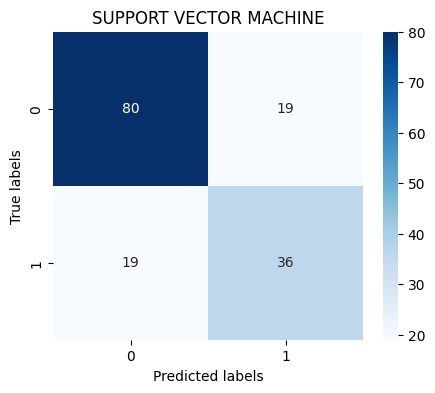

In [ ]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SUPPORT VECTOR MACHINE
classifier = SVC(kernel='linear', random_state=42)

# Training the classifier
classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test)

# Generating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generating classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report for svm model:")
print(class_report)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
print("\n                  Confusion Matrix")
plt.title('SUPPORT VECTOR MACHINE')
plt.show()


Confusion Matrix:
[[80 19]
 [19 36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Accuracy: 0.7467532467532467

                  Confusion Matrix


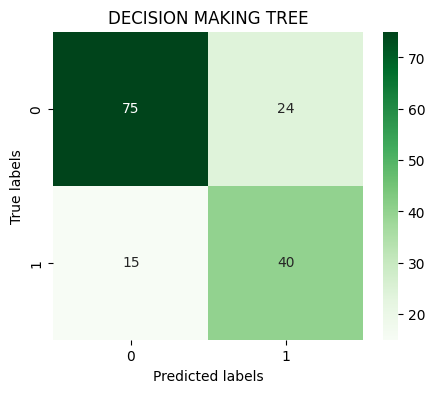

In [ ]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the DECISION MAKING TREE
classifier = DecisionTreeClassifier(random_state=42)

# Training the classifier
classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test)

# Generating confusion matrix
con_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generating classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(con_matrix, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
print("\n                  Confusion Matrix")
plt.title('DECISION MAKING TREE')
plt.show()


Confusion Matrix:
[[80 19]
 [19 36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

Accuracy: 0.7207792207792207

                  Confusion Matrix


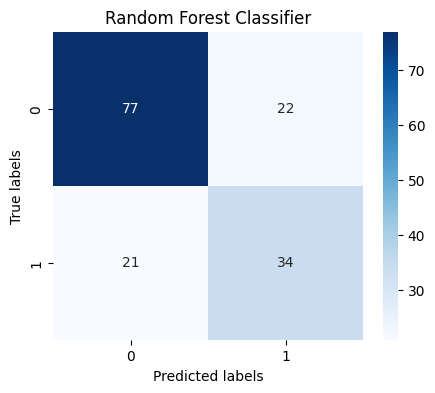

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Generating confusion matrix
co_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generating classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(co_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
print("\n                  Confusion Matrix")
plt.title('Random Forest Classifier')
plt.show()

Confusion Matrix:
[[70 29]
 [23 32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        99
           1       0.52      0.58      0.55        55

    accuracy                           0.66       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.66      0.67       154

Accuracy: 0.6623376623376623

                  Confusion Matrix


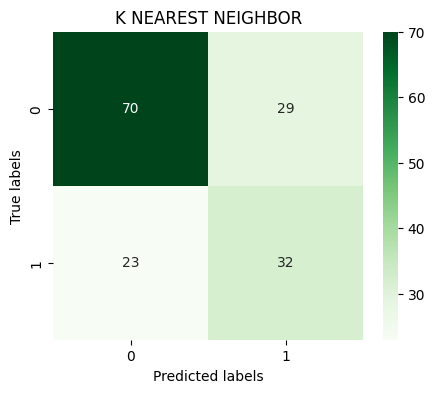

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the K Nearest Neighbor
classifier = KNeighborsClassifier(n_neighbors=5)

# Training the classifier
classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test)

# Generating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generating classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
print("\n                  Confusion Matrix")
plt.title('K NEAREST NEIGHBOR')
plt.show()


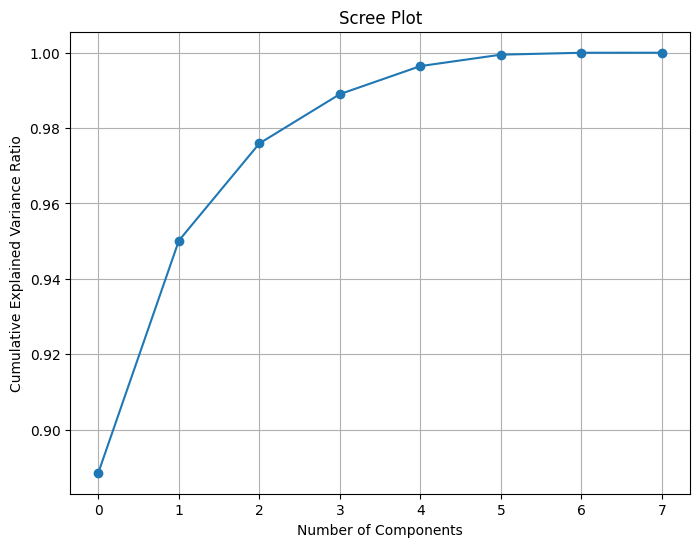

In [ ]:
from sklearn.decomposition import PCA
# Fit PCA to determine explained variance ratio
pca = PCA()
pca.fit(X)

# Plot scree plot
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [ ]:
pca = PCA(n_components=2)  # Assuming you found 2 components to be optimal
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a classifier on the transformed data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_pca, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test_pca)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier")
print("Accuracy:", accuracy)

Random Forest Classifier
Accuracy: 0.6753246753246753


In [ ]:
pca = PCA(n_components=2)  # Assuming you found 2 components to be optimal
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a classifier on the transformed data
clf =  DecisionTreeClassifier(random_state=42)

# Training the classifier
clf.fit(X_train_pca, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test_pca)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Classifier")
print("Accuracy:", accuracy)

Decision Tree Classifier
Accuracy: 0.6038961038961039


In [ ]:
pca = PCA(n_components=2)  # Assuming you found 2 components to be optimal
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a classifier on the transformed data
clf =  KNeighborsClassifier(n_neighbors=5)

# Training the classifier
clf.fit(X_train_pca, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test_pca)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(" K Neighbors Classifier")
print("Accuracy:", accuracy)

 K Neighbors Classifier
Accuracy: 0.6818181818181818


In [ ]:
pca = PCA(n_components=2)  # Assuming you found 2 components to be optimal
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a classifier on the transformed data
classifier = SVC(kernel='linear', random_state=42)

# Training the classifier
classifier.fit(X_train_pca, y_train)

# Predict on the testing set
y_pred = classifier.predict(X_test_pca)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Support Vector Machine")
print("Accuracy:", accuracy)

Support Vector Machine
Accuracy: 0.7532467532467533


In [ ]:
model= SVC(kernel='linear', random_state=42)
model.fit(X_train,y_train)

SVC(kernel='linear', random_state=42)

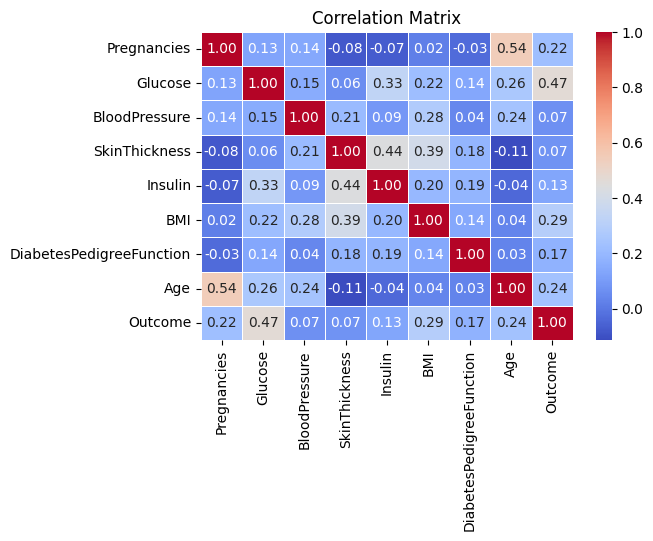

In [ ]:
corr_matrix = df.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [ ]:
y_pred = model.predict(X_test)

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
predicted_price=sc.inverse_transform(y_pred)

In [ ]:
import numpy as np

# Assuming you have an array named 'original_array'
original_array = np.array([5,166,72,19,175,25.8,0.587,51])

# Reshape the array to a different shape, for example, (1, 9)
reshaped_array = original_array.reshape(1, 8)

print("Original Array:")
print(original_array)

print("\nReshaped Array:")
print(reshaped_array)

Original Array:
[  5.    166.     72.     19.    175.     25.8     0.587  51.   ]

Reshaped Array:
[[  5.    166.     72.     19.    175.     25.8     0.587  51.   ]]


In [ ]:
 new_data= np.array([])
 reshaped_array =  new_data.reshape(1, 8)
 new_data_predictions = model.predict( reshaped_array)
if(new_data_predictions==1):
    print("The person has diabetics.")
if(new_data_predictions==0):
    print("The person does not has diabetics.")

The person does not has diabetics.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
 new_data= np.array([7,196,90,0,0,39.8,0.451,41])
 reshaped_array =  new_data.reshape(1, 8)
 new_data_predictions = model.predict( reshaped_array)
if(new_data_predictions==1):
    print("The person has diabetics.")
if(new_data_predictions==0):
    print("The person does not has diabetics.")

The person has diabetics.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
